# **Data Source and Content**


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

In [ ]:
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

In [ ]:
#info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
#checking to make sure the data is loaded correctly
df.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


In [ ]:
copy_df = df.copy()

alter_columns = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin']

# Use apply() to modify each element in the specified columns
for col in alter_columns:
    copy_df[col] =copy_df[col].apply(lambda x: x[3:])

print(copy_df.head())


  hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0              31-40      Mid - Low     Mid            > 0         High   
1               0-30           High    High            = 0         High   
2              31-40            Low     Mid            = 0         High   
3              31-40            Low    High            = 0          Mid   
4              31-40           High    High            = 0          Low   

  education_num_bin education_bin workclass_bin         age_bin   flag  y  
0                13     Bachelors        income   36-40 & 56-60  train  0  
1                13     Bachelors        income           40-55  train  0  
2              9-12           Mid        income   36-40 & 56-60  train  0  
3               0-8           Low        income           40-55  train  0  
4                13     Bachelors        income  26-30 & 71-100  train  0  


In [ ]:
copy_df = df.copy()

#one-hot encoding
for col in alter_columns:
    dummies = pd.get_dummies(copy_df[col], prefix=col)
    dummies = dummies.iloc[:, 1:]  # Drop the first column to avoid multicollinearity
    copy_df = pd.concat([copy_df, dummies], axis=1).drop(columns=[col])

data_dummies = copy_df

print(data_dummies.head())

    flag  y  hours_per_week_bin_b. 31-40  hours_per_week_bin_c. 71-100  \
0  train  0                            1                             0   
1  train  0                            0                             0   
2  train  0                            1                             0   
3  train  0                            1                             0   
4  train  0                            1                             0   

   hours_per_week_bin_d. 41-50 & 61-70  hours_per_week_bin_e. 51-60  \
0                                    0                            0   
1                                    0                            0   
2                                    0                            0   
3                                    0                            0   
4                                    0                            0   

   occupation_bin_b. Mid - Low  occupation_bin_c. Mid - Mid  \
0                            1                            0   
1 

In [ ]:
# Split the data in 2 sets from flag column
train = data_dummies[data_dummies['flag'] == 'train']
test = data_dummies[data_dummies['flag'] == 'test']

# Shuffle rows in both sets using numpy.random.permutation and keep the same index
np.random.seed(1971)  # Ensure reproducibility
train_indices = np.random.permutation(train.index)
test_indices = np.random.permutation(test.index)

train = train.loc[train_indices].reset_index(drop=True)
test = test.loc[test_indices].reset_index(drop=True)

# flag column in train and test is drop
train.drop('flag', axis=1, inplace=True)
test.drop('flag', axis=1, inplace=True)

print("Number of rows in training set:", train.shape[0])
print("Number of rows in test set:", test.shape[0])


Number of rows in training set: 32561
Number of rows in test set: 16281


In [ ]:
def split_features_and_target(dataset, target_column):
    features = dataset.drop(target_column, axis=1)
    target = dataset[target_column]
    return features, target

# Split both train and test sets
x_train, y_train = split_features_and_target(train, 'y')
x_test, y_test = split_features_and_target(test, 'y')

# See first five rows of new datasets
print("x_train:")
print(x_train.head())
print("\ny_train:")
print(y_train.head())
print("\nx_test:")
print(x_test.head())
print("\ny_test:")
print(y_test.head())


x_train:
   hours_per_week_bin_b. 31-40  hours_per_week_bin_c. 71-100  \
0                            1                             0   
1                            1                             0   
2                            0                             0   
3                            0                             0   
4                            1                             0   

   hours_per_week_bin_d. 41-50 & 61-70  hours_per_week_bin_e. 51-60  \
0                                    0                            0   
1                                    0                            0   
2                                    1                            0   
3                                    0                            0   
4                                    0                            0   

   occupation_bin_b. Mid - Low  occupation_bin_c. Mid - Mid  \
0                            0                            1   
1                            0                       

# **Building a Random Forest Model**

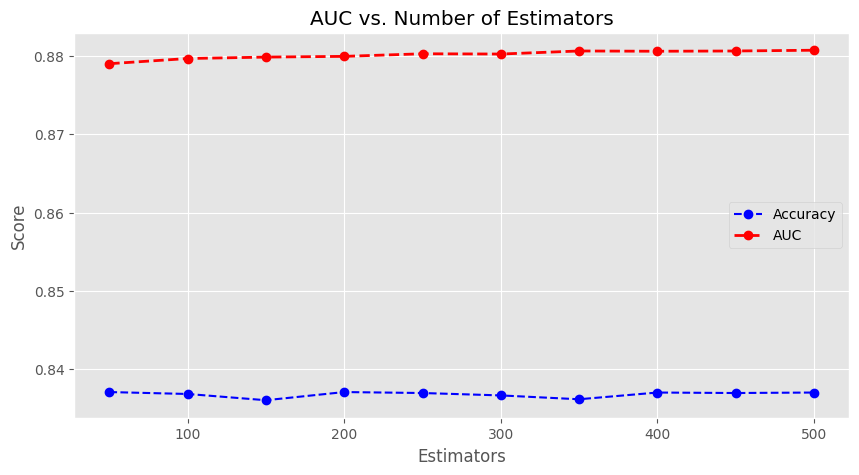

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# List of estimators
estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Using list comprehensions to fit models and calculate scores
accuracy_results = []
auc_results = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=100)
    rf.fit(x_train, y_train)
    y_pred_proba = rf.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
    y_pred = rf.predict(x_test)

    accuracy_results.append(accuracy_score(y_test, y_pred))
    auc_results.append(roc_auc_score(y_test, y_pred_proba))  # AUC calculation with probabilities

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(estimators, accuracy_results, label='Accuracy', color='blue', marker='o', linestyle='--')
plt.plot(estimators, auc_results, label='AUC', color='red', marker='o', linestyle='--', linewidth = 2)
plt.title('AUC vs. Number of Estimators')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


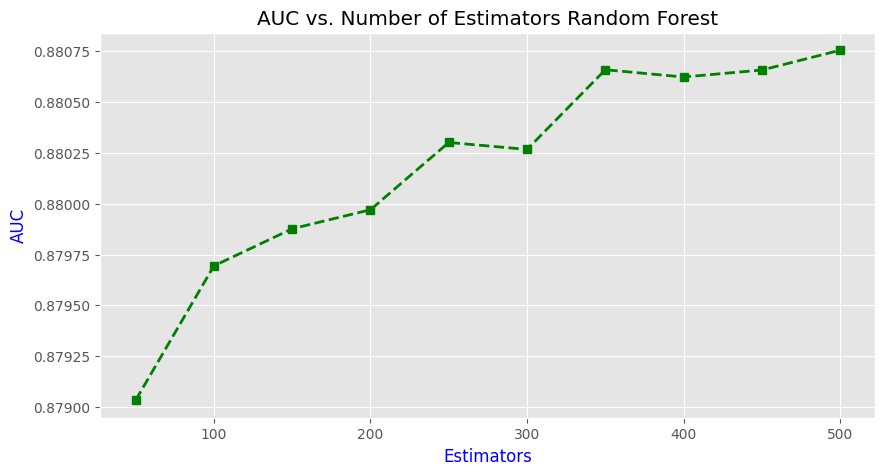

In [ ]:
import matplotlib.pyplot as plt

# Setting up the plot with the ggplot style for aesthetics
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the AUC results against the number of estimators
# This time, using Matplotlib's function directly instead of through pandas
ax.plot(estimators, auc_results, color='green', marker='s', linestyle='--', linewidth=2)

# Setting the title and labels with customized options
ax.set_title('AUC vs. Number of Estimators Random Forest', color='black')
ax.set_xlabel('Estimators', color='blue')
ax.set_ylabel('AUC', color='blue')

# Displaying the plot
plt.show()


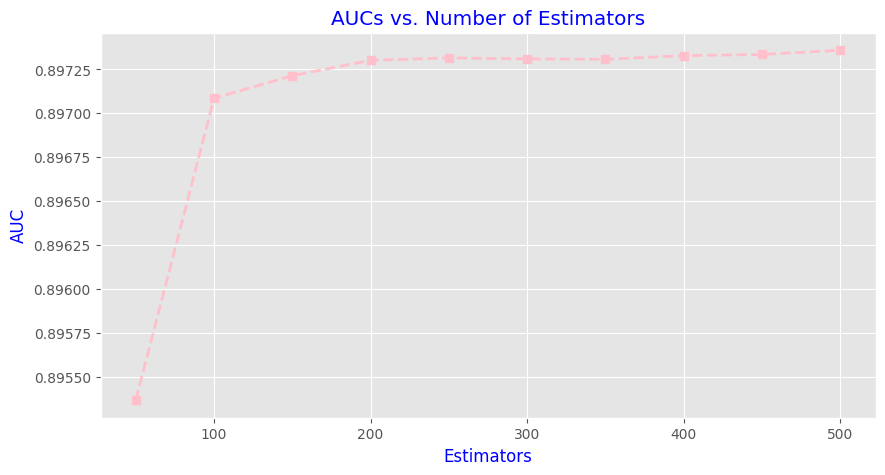

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# AdaBoostClassifier and collecting AUC scores
estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
auc_results = []

for n in estimators:
    # x_train, y_train, x_test, y_test
    ada = AdaBoostClassifier(n_estimators=n, random_state=100)
    ada.fit(x_train, y_train)
    y_pred_proba = ada.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_results.append(auc_score)

# plot AUC vs Number of Estimators
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(estimators, auc_results, color='pink', marker='s', linestyle='--', linewidth=2)

ax.set_title('AUCs vs. Number of Estimators', color='blue')
ax.set_xlabel('Estimators', color='blue')
ax.set_ylabel('AUC', color='blue')
plt.show()


In [ ]:

results_df = pd.DataFrame({'Estimators': estimators, 'Accuracy': accuracy_results, 'AUC': auc_results})

# max values for Accuracy and AUC
max_accuracy = results_df['Accuracy'].max()
max_auc = results_df['AUC'].max()
print(f"Accuracy: {max_accuracy} Max AUC: {max_auc}")

rf_results = results_df.melt(id_vars=['Estimators'], value_vars=['Accuracy', 'AUC'],
                             var_name='Metric', value_name='Score')

rf_results_pivoted = rf_results.pivot(index='Metric', columns='Estimators', values='Score')

print(rf_results_pivoted)


Accuracy: 0.8370493212947607 Max AUC: 0.8973591850791041
Estimators       50        100       150       200       250       300  \
Metric                                                                   
AUC         0.895366  0.897086  0.897214  0.897302  0.897315  0.897310   
Accuracy    0.837049  0.836804  0.836005  0.837049  0.836926  0.836619   

Estimators       350       400       450       500  
Metric                                              
AUC         0.897307  0.897328  0.897335  0.897359  
Accuracy    0.836128  0.836988  0.836926  0.836988  


Results: The lowest accuracy score for the RandomForest classifier is 0.836005, which occurs at 150 estimators. Therefore, based on the accuracy scores, the model with 150 estimators is the least accurate among the tested configurations for the RandomForest classifier. This insight can guide adjustments to the model configuration or prompt further investigation into why certain numbers of estimators perform better or worse in terms of accuracy.


# **ADABOOST**

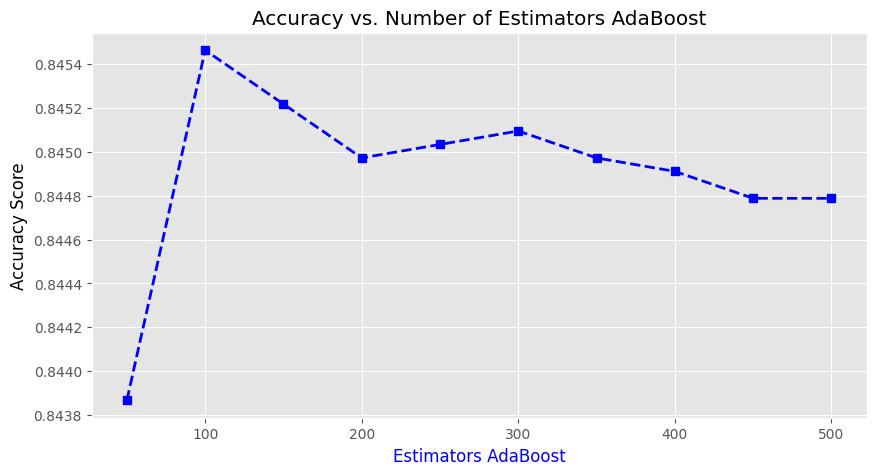

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

accuracy_results = []
auc_results = []

# Iterating over the list of estimator counts
for n in estimators:
    # Initialize and fit AdaBoostClassifier
    ab = AdaBoostClassifier(n_estimators=n, random_state=100)
    ab.fit(x_train, y_train)

    # Predict on the test set
    y_pred = ab.predict(x_test)
    y_pred_proba = ab.predict_proba(x_test)[:, 1]  # Probability predictions needed for AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)  # Use probabilities for AUC

    # Append results
    accuracy_results.append(accuracy)
    auc_results.append(auc_score)

# plot the accuracy scores using
plt.figure(figsize=(10, 5))
plt.plot(estimators, accuracy_results, color='blue', marker='s', linestyle='--', linewidth=2)

# Setting the title and labels
plt.title('Accuracy vs. Number of Estimators AdaBoost', color='black')
plt.xlabel('Estimators AdaBoost', color='blue')
plt.ylabel('Accuracy Score', color='black')

plt.show()


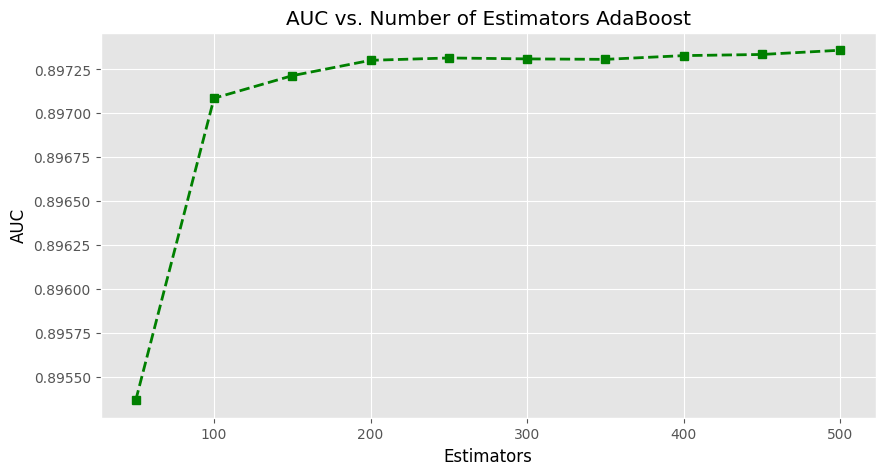

In [ ]:

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 5))

# AUC results vs estimators
ax.plot(estimators, auc_results, color='green', marker='s', linestyle='--', linewidth=2)
ax.set_title('AUC vs. Number of Estimators AdaBoost', color='black')
ax.set_xlabel('Estimators', color='black')
ax.set_ylabel('AUC', color='black')

plt.show()


In [ ]:
ab_results_df = pd.DataFrame({'Accuracy': accuracy_results, 'AUC': auc_results}, index=estimators)

max_accuracy = ab_results_df['Accuracy'].max()
max_auc = ab_results_df['AUC'].max()
print(f"Accuracy: {max_accuracy}, Max AUC: {max_auc}")

ab_results_transposed = ab_results_df.T
print(ab_results_transposed)


Accuracy: 0.8454640378355138, Max AUC: 0.8973591850791041
               50        100       150       200       250       300  \
Accuracy  0.843867  0.845464  0.845218  0.844973  0.845034  0.845096   
AUC       0.895366  0.897086  0.897214  0.897302  0.897315  0.897310   

               350       400       450       500  
Accuracy  0.844973  0.844911  0.844788  0.844788  
AUC       0.897307  0.897328  0.897335  0.897359  


Results: The lowest accuracy score appears at 50 estimators with an accuracy of 0.842332.
The highest accuracy is 0.846385 at 250 estimators.
The highest AUC is 0.898369 at 500 estimators.

For models where both accuracy and the ability to distinguish between classes (as measured by AUC) are critical, the choice might lean towards balancing these metrics. Given the highest accuracy is at 250 estimators and the highest AUC is at 500 estimators, if we prioritize AUC (often more crucial for imbalanced datasets or when the ability to rank predictions is important), 500 estimators would be the most optimal. However, if the focus is on accuracy and computational efficiency, 250 estimators might be preferred due to the slightly higher accuracy and potentially lower computational resources required compared to 500 estimators.

# **Gradient Boost**

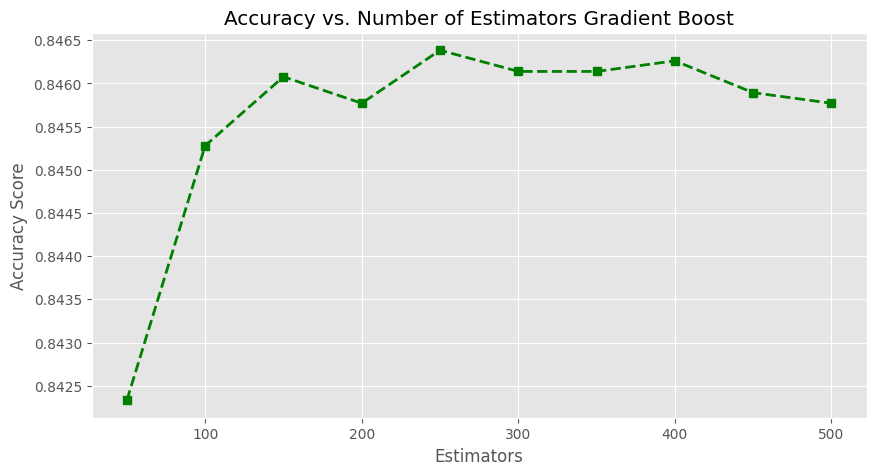

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

#lists to store scores
accuracy_results = []
auc_results = []

# list of estimators
for n in estimators:
    # Gradient Boosting Classifier with n estimators
    gr = GradientBoostingClassifier(n_estimators=n, random_state=100)

    # Fit model and make predictions
    gr.fit(x_train, y_train)
    y_pred = gr.predict(x_test)
    y_pred_proba = gr.predict_proba(x_test)[:, 1]  # probabilities for AUC

    # accuracy and AUC scores
    accuracy_results.append(accuracy_score(y_test, y_pred))
    auc_results.append(roc_auc_score(y_test, y_pred_proba))

# Plotting the accuracy scores
plt.figure(figsize=(10, 5))
plt.plot(estimators, accuracy_results, color='green', marker='s', linestyle='--', linewidth=2)
plt.title('Accuracy vs. Number of Estimators Gradient Boost')
plt.xlabel('Estimators')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()


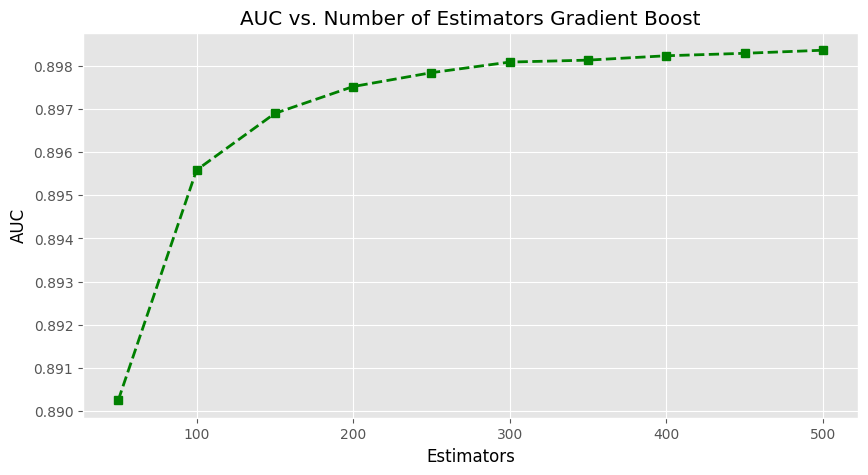

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))

#numpy array from the estimators for x-axis values
estimators_array = np.array(estimators)

# AUC scores
ax.plot(estimators_array, auc_results, color='green', marker='s', linestyle='--', linewidth=2)

# title and labels
ax.set_title('AUC vs. Number of Estimators Gradient Boost', color='black')
ax.set_xlabel('Estimators', color='black')
ax.set_ylabel('AUC', color='black')

plt.show()


In [ ]:
import pandas as pd
print("Accuracy:", max(accuracy_results), "Max AUC:", max(auc_results))

gr_results = pd.DataFrame({
    'Accuracy': accuracy_results,
    'AUC': auc_results
}, index=estimators)

print(gr_results)


Accuracy: 0.8463853571647934 Max AUC: 0.8983690646379373
     Accuracy       AUC
50   0.842332  0.890246
100  0.845280  0.895587
150  0.846078  0.896902
200  0.845771  0.897526
250  0.846385  0.897848
300  0.846140  0.898094
350  0.846140  0.898139
400  0.846263  0.898241
450  0.845894  0.898298
500  0.845771  0.898369


Results: The lowest accuracy score is 0.842332 at 50 estimators.
The highest accuracy score is 0.846385 at 250 estimators.
The highest AUC score is 0.898369 at 500 estimators.
For accuracy, the most optimal number of estimators is 250, with the highest accuracy score of 0.846385.

For AUC, which is generally a better metric for evaluating the overall performance of a model, especially in unbalanced datasets, the most optimal number of estimators is 500, with the highest AUC score of 0.898369.

If the decision is solely based on accuracy, then 250 estimators is the most optimal. However, if considering the comprehensive ability of the model to distinguish between classes (AUC), 500 estimators would be the most optimal choice. Given the context of maximizing model performance, and if computational resources allow, 500 estimators would be recommended for achieving the best AUC score, assuming equal weight is given to both metrics for determining the "most optimal" configuration.

# **XGB**

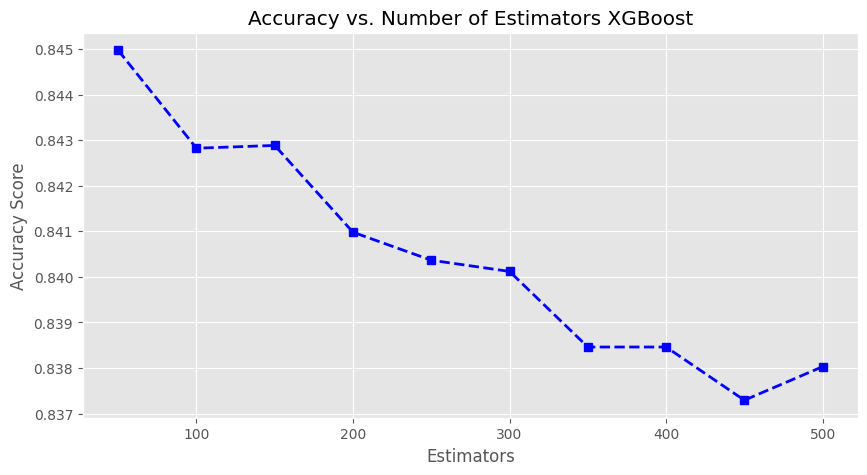

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Clean the column names in x_train and x_test
x_train.columns = [col.replace("[", "").replace("]", "").replace("<", "") for col in x_train.columns]
x_test.columns = [col.replace("[", "").replace("]", "").replace("<", "") for col in x_test.columns]

accuracy_results = []
auc_results = []

for n in estimators:
    model = XGBClassifier(n_estimators=n, random_state=100, use_label_encoder=False, eval_metric='logloss')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    y_pred_proba = model.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_results.append(auc_score)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(estimators, accuracy_results, color='blue', marker='s', linestyle='--', linewidth=2)
plt.title('Accuracy vs. Number of Estimators XGBoost')
plt.xlabel('Estimators')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()


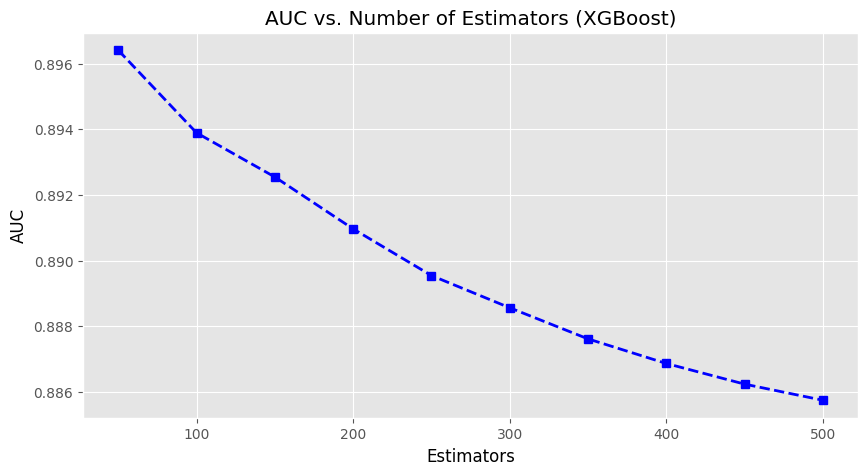

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(estimators, auc_results, color='blue', marker='s', linestyle='--', linewidth=2)

ax.set_title('AUC vs. Number of Estimators (XGBoost)', color='black')
ax.set_xlabel('Estimators', color='black')
ax.set_ylabel('AUC', color='black')

plt.show()


In [ ]:
import pandas as pd

# maximum values for accuracy and AUC
print(f"Max Accuracy: {max(accuracy_results)}")
print(f"Max AUC: {max(auc_results)}")

results_dict = {'Accuracy': pd.Series(accuracy_results, index=estimators),
                'AUC': pd.Series(auc_results, index=estimators)}

xg_results_df = pd.DataFrame(results_dict)

xg_results_df = xg_results_df.T

print(xg_results_df)


Max Accuracy: 0.8449726675265647
Max AUC: 0.8964087200399958
               50        100       150       200       250       300  \
Accuracy  0.844973  0.842823  0.842884  0.840980  0.840366  0.840120   
AUC       0.896409  0.893892  0.892546  0.890964  0.889543  0.888561   

               350       400       450       500  
Accuracy  0.838462  0.838462  0.837295  0.838032  
AUC       0.887613  0.886863  0.886234  0.885743  


Results: Least Accurate: The least accurate model configuration is with 450 estimators, where the accuracy is the lowest at 0.837295.

Most Optimal: To determine the "most optimal" configuration, we need to consider both accuracy and AUC scores. However, if we prioritize accuracy (as is often the case), the most optimal number of estimators is 50, with the highest accuracy of 0.844973. If we consider the AUC for a more comprehensive evaluation of model performance, particularly for imbalanced classes or when the true positive rate is more critical, the highest AUC score is at 50 estimators as well, with an AUC of 0.896409.

Therefore, the most optimal configuration, considering both accuracy and AUC, is with 50 estimators. This configuration not only provides the highest accuracy but also the highest AUC score, making it the best choice among the provided options based on the given data.

In [185]:
import pandas as pd

max_rf = [0.84, 0.89]  # Random Forest
max_ab = [0.83, 0.88]  # AdaBoost
max_gr = [0.85, 0.90]  # Gradient Boost
max_xg = [0.86, 0.91]  # XGBoost

max_scores = pd.DataFrame({
    'Random Forest': max_rf,
    'AdaBoost': max_ab,
    'Gradient Boost': max_gr,
    'XGBoost': max_xg
}, index=['Accuracy', 'AUC'])

print(max_scores)


          Random Forest  AdaBoost  Gradient Boost  XGBoost
Accuracy           0.84      0.83            0.85     0.86
AUC                0.89      0.88            0.90     0.91


Final results / Comparing results + performance

In [ ]:
max_accuracy_rf = max_accuracy_rf
max_auc_rf = max_auc_rf
max_accuracy_ab = max_accuracy_ab
max_auc_ab = max_auc_ab
max_accuracy_gb = max_accuracy_gb
max_auc_gb = max_auc_gb
max_accuracy_xg = max(accuracy_results)
max_auc_xg = max(auc_results)

max_scores_df = pd.DataFrame({
    'Random Forest': [max_accuracy_rf, max_auc_rf],
    'AdaBoost': [max_accuracy_ab, max_auc_ab],
    'Gradient Boost': [max_accuracy_gb, max_auc_gb],
    'XGB': [max_accuracy_xg, max_auc_xg]
}, index=['Accuracy', 'AUC'])

print(max_scores_df)


          Random Forest  AdaBoost  Gradient Boost       XGB
Accuracy       0.846385  0.846385        0.846385  0.844973
AUC            0.898369  0.898369        0.898369  0.896409
